<a href="https://colab.research.google.com/github/Mystic6303/ML-DL-projects/blob/main/Earthquake_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
df=pd.read_excel("Earthquake_data_processed.xlsx")
df.head()

,Unnamed: 0,Date(YYYY/MM/DD),Time(UTC),Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,0,1966/07/01,09:41:21.82,35.9463,-120.4700,12.26,3.2,Mx,7,171,20,0.02,NCSN,-4540462
1,1,1966/07/02,12:08:34.25,35.7867,-120.3265,8.99,3.7,Mx,8,86,3,0.04,NCSN,-4540520
2,2,1966/07/02,12:16:14.95,35.7928,-120.3353,9.88,3.4,Mx,8,89,2,0.03,NCSN,-4540521
3,3,1966/07/02,12:25:06.12,35.7970,-120.3282,9.09,3.1,Mx,8,101,3,0.08,NCSN,-4540522
4,4,1966/07/05,18:54:54.36,35.9223,-120.4585,7.86,3.1,Mx,9,161,14,0.04,NCSN,-4540594


In [ ]:
print(df.describe())
print(df.info())
print(df.shape)

         Unnamed: 0  Latitude(deg)  Longitude(deg)     Depth(km)  \
count  18030.000000   18030.000000    18030.000000  18030.000000   
mean    9014.500000      37.639650     -120.921935      8.876301   
std     5204.957012       1.921843        2.341440      7.698564   
min        0.000000      31.725700     -127.507000      0.000000   
25%     4507.250000      36.463700     -122.004325      4.860000   
50%     9014.500000      37.454500     -121.080700      7.070000   
75%    13521.750000      38.829925     -118.862000     10.590000   
max    18029.000000      45.562700     -112.107200    121.310000   

       Magnitude(ergs)  No_of_Stations           Gap         Close  \
count     18030.000000    18030.000000  18030.000000  18030.000000   
mean          3.427692       31.943150    147.555851     28.965225   
std           0.437849       24.535714     90.675337     42.751417   
min           3.000000        4.000000     12.000000      0.000000   
25%           3.110000       14.00000

In [ ]:
columns_to_drop = ['Unnamed: 0', 'Date(YYYY/MM/DD)', 'Time(UTC)','EventID','SRC','Magnitude_type']

# Drop the columns from the DataFrame
df1 = df.drop(columns=columns_to_drop)
df1.head()

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS
0,35.9463,-120.4700,12.26,3.2,7,171,20,0.02
1,35.7867,-120.3265,8.99,3.7,8,86,3,0.04
2,35.7928,-120.3353,9.88,3.4,8,89,2,0.03
3,35.7970,-120.3282,9.09,3.1,8,101,3,0.08
4,35.9223,-120.4585,7.86,3.1,9,161,14,0.04


Index(['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Gap'], dtype='object')


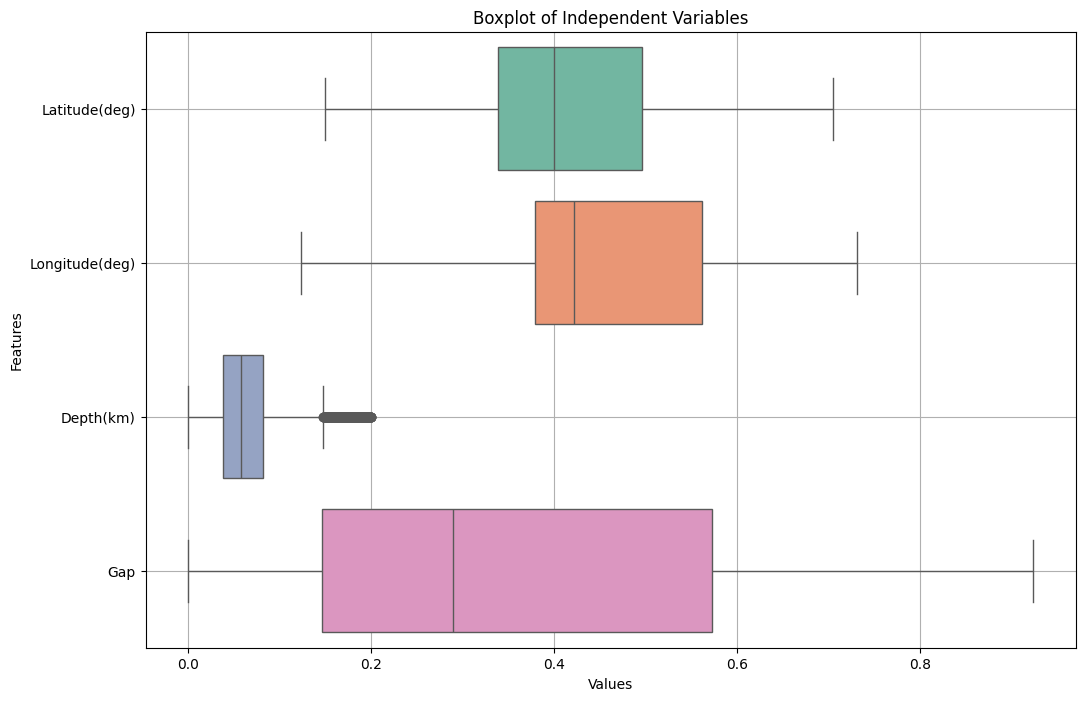

In [ ]:
X = df1[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Gap']]
y = df1[['Magnitude(ergs)']]
print(X.columns)
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()#0 to 1 range
# Fit and transform the independent variables (X) using Min-Max scaling
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
# Calculate Z-scores for each feature
z_scores = np.abs((X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0))
#standardization, deviation from mean
# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 2
# Create a boolean mask to identify outliers
outlier_mask = (z_scores > threshold).any(axis=1)
# Remove outliers from X and y
X=pd.DataFrame(data=X_scaled[~outlier_mask],columns=X.columns)
y= pd.DataFrame(data=y_scaled[~outlier_mask],columns=y.columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h', palette='Set2')
plt.title('Boxplot of Independent Variables')
plt.xlabel('Values')
plt.ylabel('Features')
plt.grid(True)
plt.show()

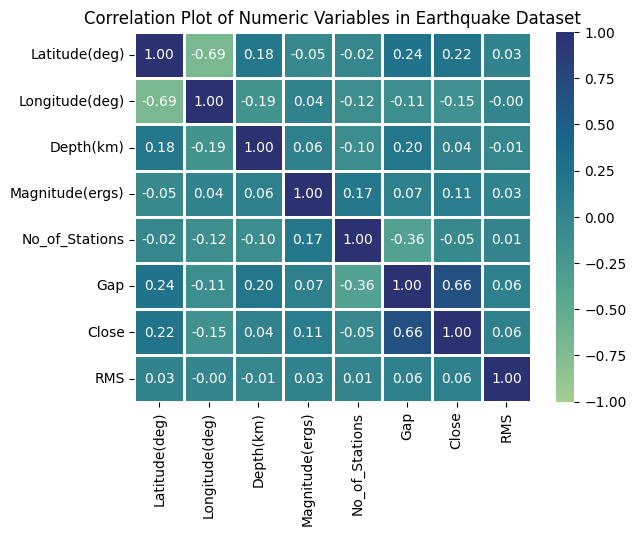

In [ ]:
corr_matrix=df1.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='crest',fmt='.2f',linewidths=1,vmin=-1,vmax=1)
plt.title('Correlation Plot of Numeric Variables in Earthquake Dataset')
plt.show()

In [ ]:
X.columns

Index(['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Gap'], dtype='object')

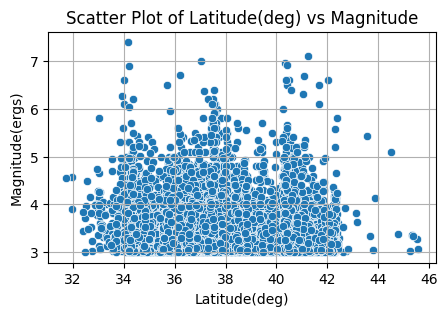

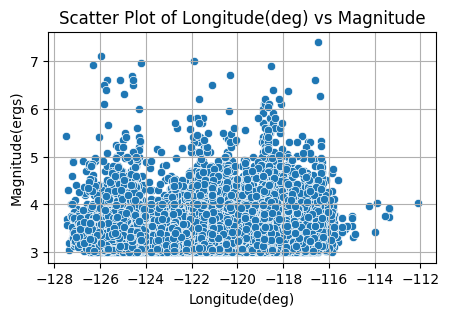

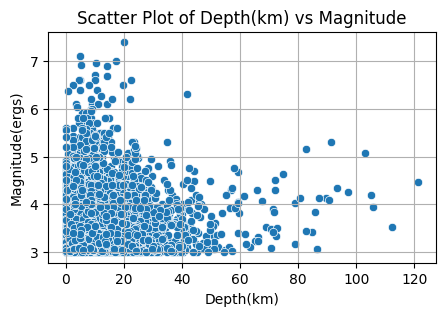

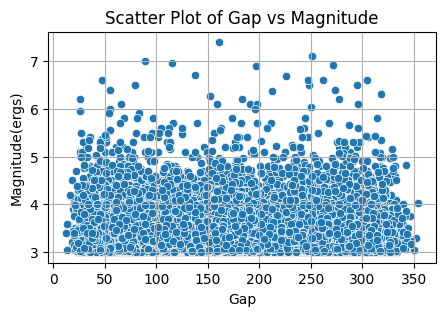

In [ ]:
for x_var in X.columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df1, x=x_var, y="Magnitude(ergs)")
    plt.title(f'Scatter Plot of {x_var} vs Magnitude')
    plt.xlabel(x_var)
    plt.ylabel("Magnitude(ergs)")
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

Mean Squared Error (MSE): 0.009233384358446292
R-squared (R2) Score: 0.010555141899787679


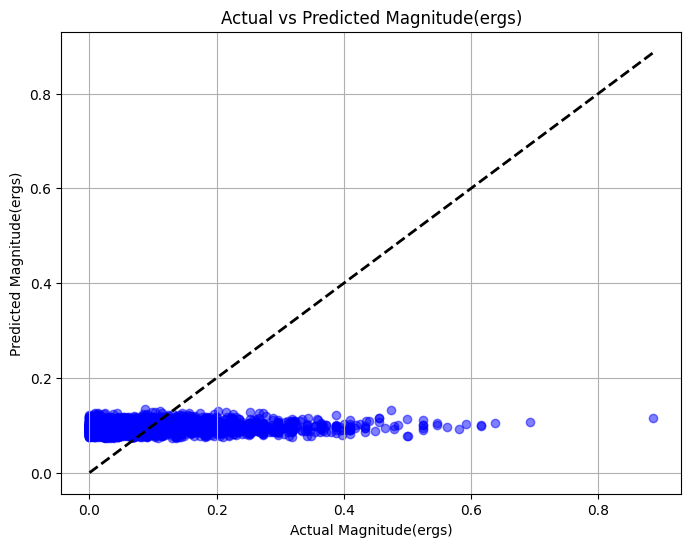

In [ ]:
#Regression methods:
#1. Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Magnitude(ergs)')
plt.ylabel('Predicted Magnitude(ergs)')
plt.title('Actual vs Predicted Magnitude(ergs)')
plt.grid(True)
plt.show()

Mean Squared Error: 0.01129350903813055
R-squared Score: -0.2102067902615563


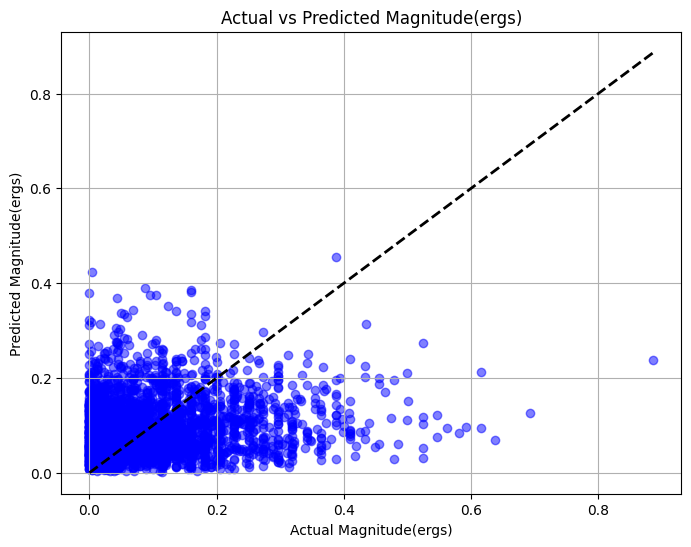

In [ ]:
#2.K-NEAREST NEIGHBOURS
from sklearn.neighbors import KNeighborsRegressor
# Create the KNN regressor with k=3 (3 nearest neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Magnitude(ergs)')
plt.ylabel('Predicted Magnitude(ergs)')
plt.title('Actual vs Predicted Magnitude(ergs)')
plt.grid(True)
plt.show()

Mean Squared Error: 0.009310044303536978
R-squared Score: 0.002340300456212474


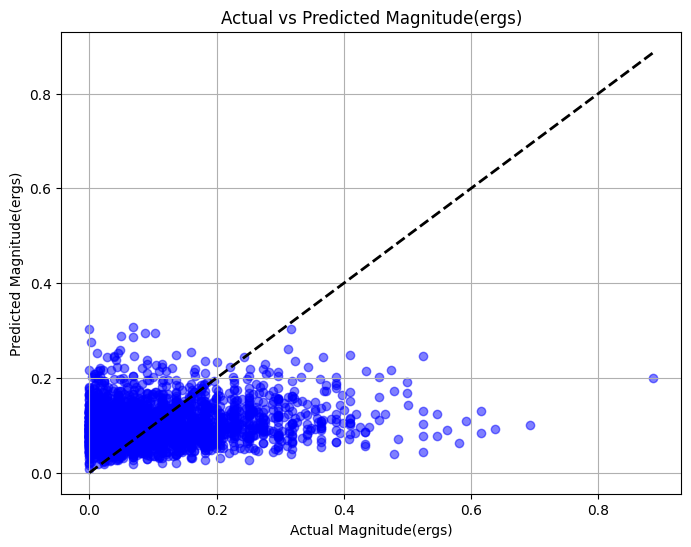

In [ ]:
#3. RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

y_train = y_train.to_numpy().ravel()
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Magnitude(ergs)')
plt.ylabel('Predicted Magnitude(ergs)')
plt.title('Actual vs Predicted Magnitude(ergs)')
plt.grid(True)
plt.show()

Mean Squared Error: 0.009303397409466903
R-squared Score: 0.0030525783063115597


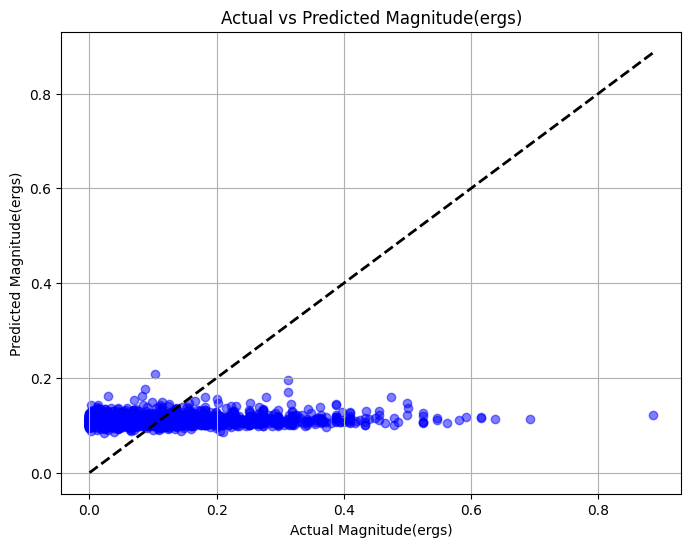

In [ ]:
#4. Support Vector Regression
from sklearn.svm import SVR
# Create an SVR model with an RBF kernel
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Magnitude(ergs)')
plt.ylabel('Predicted Magnitude(ergs)')
plt.title('Actual vs Predicted Magnitude(ergs)')
plt.grid(True)
plt.show()

In [ ]:
#Classification
print(df1.nunique())
print(df1.info())

Latitude(deg)      12408
Longitude(deg)     13301
Depth(km)           2856
Magnitude(ergs)      255
No_of_Stations       187
Gap                  337
Close                268
RMS                  202
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18030 entries, 0 to 18029
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    18030 non-null  float64
 1   Longitude(deg)   18030 non-null  float64
 2   Depth(km)        18030 non-null  float64
 3   Magnitude(ergs)  18030 non-null  float64
 4   No_of_Stations   18030 non-null  int64  
 5   Gap              18030 non-null  int64  
 6   Close            18030 non-null  int64  
 7   RMS              18030 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.1 MB
None


In [ ]:
df.columns

Index(['Unnamed: 0', 'Date(YYYY/MM/DD)', 'Time(UTC)', 'Latitude(deg)',
       'Longitude(deg)', 'Depth(km)', 'Magnitude(ergs)', 'Magnitude_type',
       'No_of_Stations', 'Gap', 'Close', 'RMS', 'SRC', 'EventID'],
      dtype='object')

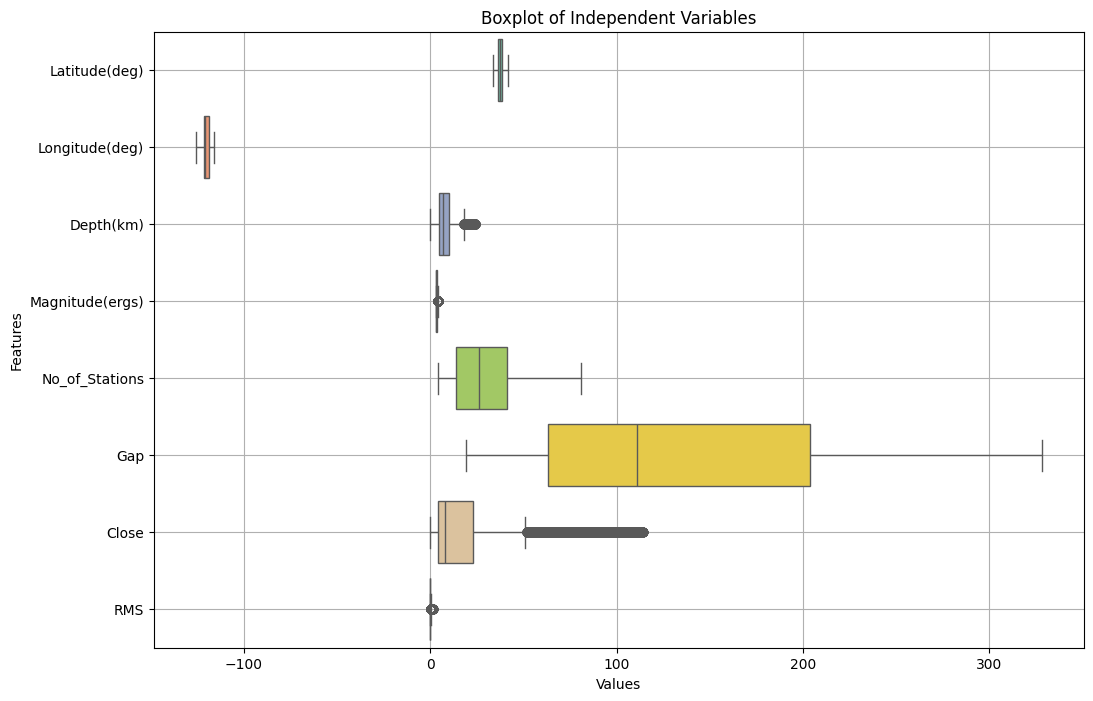

In [ ]:
A= pd.DataFrame(data=df1,columns=df1.columns)
b= pd.DataFrame(data=df,columns=['Magnitude_type'])
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit and transform the independent variables (X) using Min-Max scaling
X_scaled = scaler.fit_transform(A)
# Calculate Z-scores for each feature
z_scores = np.abs((X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 2
# Create a boolean mask to identify outliers
outlier_mask = (z_scores > threshold).any(axis=1)
# Remove outliers from X and y
X=pd.DataFrame(data=A[~outlier_mask],columns=A.columns)
y= pd.DataFrame(data=b[~outlier_mask],columns=b.columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h', palette='Set2')
plt.title('Boxplot of Independent Variables')
plt.xlabel('Values')
plt.ylabel('Features')
plt.grid(True)
plt.show()

In [ ]:
value = y.value_counts()
print(value)

Magnitude_type
Md                10336
ML                 4238
Mx                   56
Mw                   44
Name: count, dtype: int64


In [ ]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14674 entries, 0 to 18029
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    14674 non-null  float64
 1   Longitude(deg)   14674 non-null  float64
 2   Depth(km)        14674 non-null  float64
 3   Magnitude(ergs)  14674 non-null  float64
 4   No_of_Stations   14674 non-null  int64  
 5   Gap              14674 non-null  int64  
 6   Close            14674 non-null  int64  
 7   RMS              14674 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 14674 entries, 0 to 18029
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Magnitude_type  14674 non-null  object
dtypes: object(1)
memory usage: 229.3+ KB


In [ ]:
#Since data is imbalanced we use SMOTE to upsample minority classes and randomundersampler to downsample majority classes.
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


# Initialize SMOTE with a specified sampling strategy to bring minority classes up to target_class_count
smote = SMOTE(sampling_strategy={k: 5000 for k, v in Counter(y['Magnitude_type']).items() if v < 5000})

# Apply SMOTE to oversample the minority classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled['Magnitude_type']))

#initialize RandomUnderSampler to downsample majority classes to the same target_class_count
undersampler = RandomUnderSampler(sampling_strategy={k: 5000 for k, v in Counter(y_resampled['Magnitude_type']).items() if v > 5000})

# Apply RandomUnderSampler to downsample the majority classes
X_final, y_final = undersampler.fit_resample(X_resampled, y_resampled)

# Check the final class distribution
print("After RandomUnderSampler:", Counter(y_final['Magnitude_type']))

After SMOTE: Counter({'Md': 10336, 'Mx': 5000, 'ML': 5000, 'Mw': 5000})
After RandomUnderSampler: Counter({'ML': 5000, 'Md': 5000, 'Mw': 5000, 'Mx': 5000})


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.63
Confusion Matrix:
[[ 795  318  233  139]
 [ 471  513  107  441]
 [ 137   36 1338    0]
 [ 102  195   18 1157]]
Classification Report:
              precision    recall  f1-score   support

          ML       0.53      0.54      0.53      1485
          Md       0.48      0.33      0.40      1532
          Mw       0.79      0.89      0.83      1511
          Mx       0.67      0.79      0.72      1472

    accuracy                           0.63      6000
   macro avg       0.62      0.64      0.62      6000
weighted avg       0.62      0.63      0.62      6000



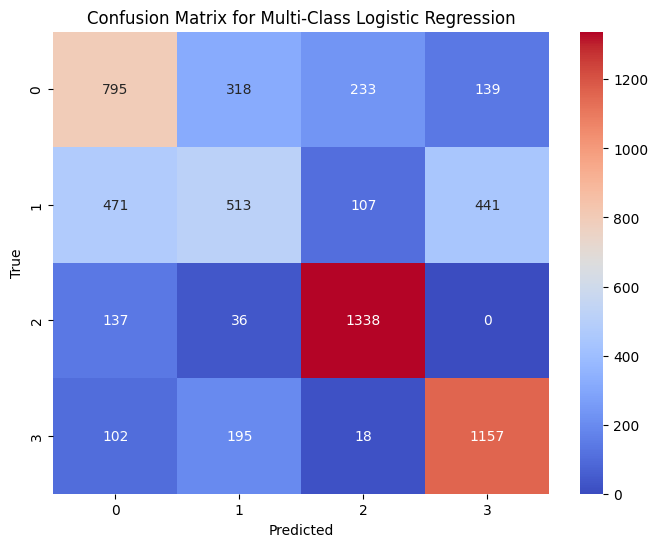

In [ ]:
#1.Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 2))

# Apply the scaler to the training and test data
X_normalized = scaler.fit_transform(X_final)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_final, test_size=0.3, random_state=42)

# Create a logistic regression model configured for multi-class
# 'multinomial' uses softmax, 'ovr' uses one-vs-rest

# Create logistic regression model
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)

# Train the model with the resampled data
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Get a classification report (including precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Multi-Class Logistic Regression")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.84
Confusion Matrix:
[[1034  348   67   36]
 [ 408 1007   28   89]
 [   1    0 1510    0]
 [   2    1    0 1469]]
Classification Report:
              precision    recall  f1-score   support

          ML       0.72      0.70      0.71      1485
          Md       0.74      0.66      0.70      1532
          Mw       0.94      1.00      0.97      1511
          Mx       0.92      1.00      0.96      1472

    accuracy                           0.84      6000
   macro avg       0.83      0.84      0.83      6000
weighted avg       0.83      0.84      0.83      6000



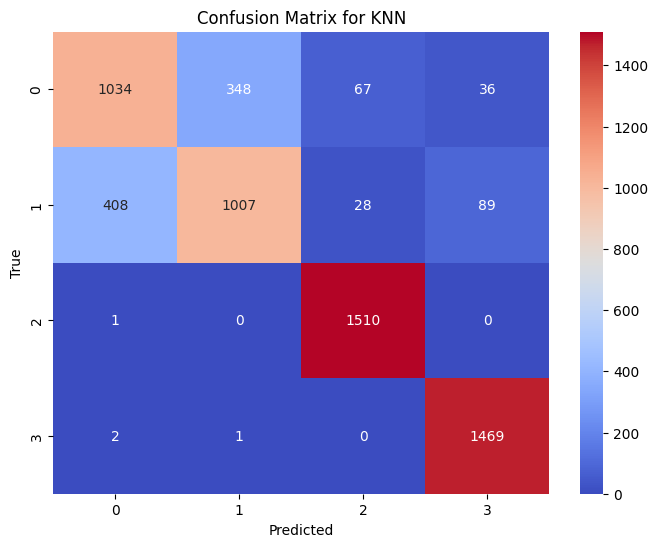

In [ ]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_final, test_size=0.3, random_state=42)
# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Get a classification report (including precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.61
Confusion Matrix:
[[ 774  296  218  197]
 [ 465  399  134  534]
 [ 171   43 1297    0]
 [ 175   89   42 1166]]
Classification Report:
              precision    recall  f1-score   support

          ML       0.49      0.52      0.50      1485
          Md       0.48      0.26      0.34      1532
          Mw       0.77      0.86      0.81      1511
          Mx       0.61      0.79      0.69      1472

    accuracy                           0.61      6000
   macro avg       0.59      0.61      0.59      6000
weighted avg       0.59      0.61      0.59      6000



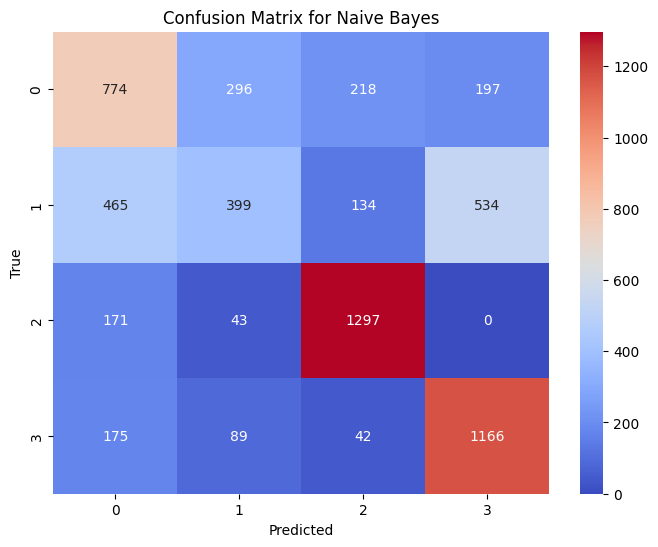

In [ ]:
#Using NaiveBayes
from sklearn.naive_bayes import GaussianNB
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Get a classification report (including precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

<ipython-input-25-18db8d182fee>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.89
Confusion Matrix:
[[1231  229   18    7]
 [ 357 1143    7   25]
 [   1    0 1510    0]
 [   6    0    0 1466]]
Classification Report:
              precision    recall  f1-score   support

          ML       0.77      0.83      0.80      1485
          Md       0.83      0.75      0.79      1532
          Mw       0.98      1.00      0.99      1511
          Mx       0.98      1.00      0.99      1472

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



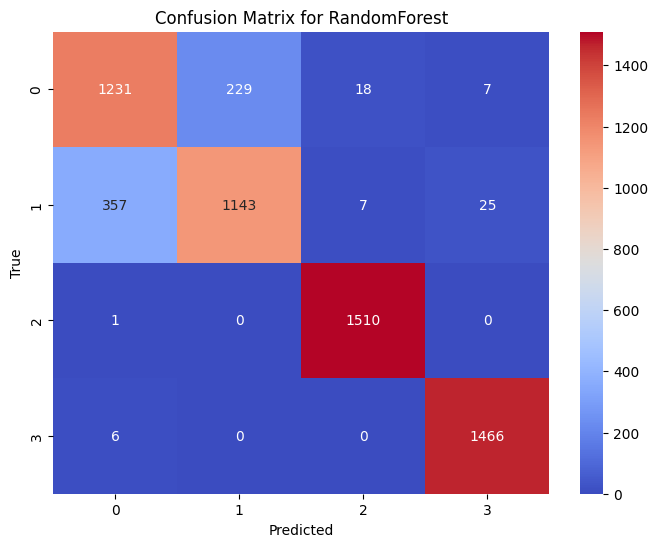

In [ ]:
#using RandomForest
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=40)

# Fit the model to the training data
rf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Get a classification report (including precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for RandomForest")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.65
Confusion Matrix:
[[ 843  269  259  114]
 [ 520  473  120  419]
 [  75    4 1432    0]
 [ 139  142   25 1166]]
Classification Report:
              precision    recall  f1-score   support

          ML       0.53      0.57      0.55      1485
          Md       0.53      0.31      0.39      1532
          Mw       0.78      0.95      0.86      1511
          Mx       0.69      0.79      0.74      1472

    accuracy                           0.65      6000
   macro avg       0.63      0.65      0.63      6000
weighted avg       0.63      0.65      0.63      6000



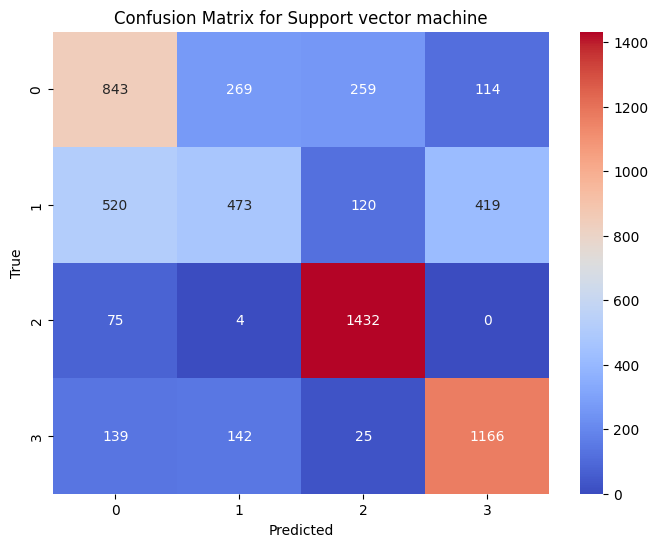

In [ ]:
#Using support vector machine
from sklearn.svm import SVC
# Initialize SVM with a linear kernel
svm = SVC(kernel='linear', C=1.0)
# Adjust `C` for regularization strength

# Fit the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Get a classification report (including precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Support vector machine")
plt.show()

In [ ]:
#Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X.head()


,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS
0,35.9463,-120.4700,12.26,3.2,7,171,20,0.02
1,35.7867,-120.3265,8.99,3.7,8,86,3,0.04
2,35.7928,-120.3353,9.88,3.4,8,89,2,0.03
3,35.7970,-120.3282,9.09,3.1,8,101,3,0.08
4,35.9223,-120.4585,7.86,3.1,9,161,14,0.04


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


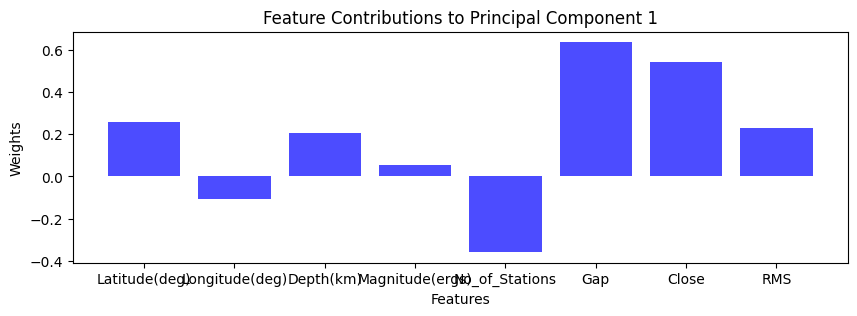

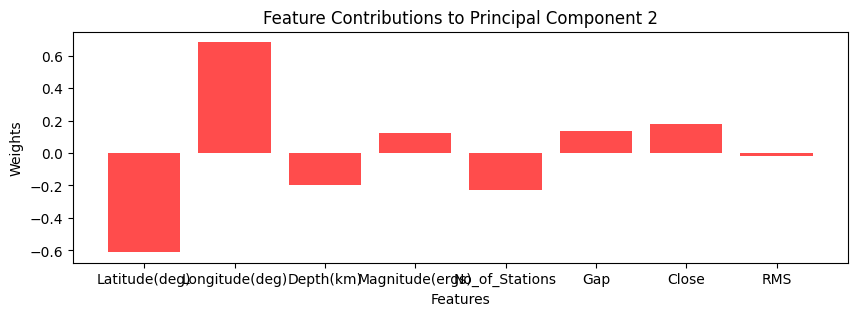

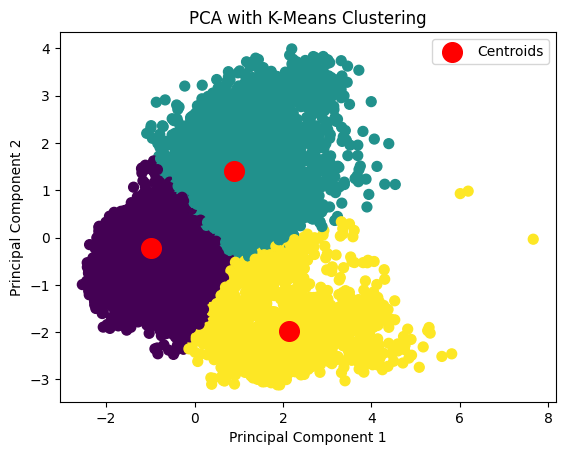

In [ ]:
scaler = StandardScaler()  # Standardize to mean 0, standard deviation 1
X_scaled = scaler.fit_transform(X)  # Apply scaling

#Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

#Apply K-means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=46)  # Set number of clusters and random state
clusters = kmeans.fit_predict(X_pca)  # Get cluster assignments
# Principal Component 1
plt.figure(figsize=(10, 3))
plt.bar(X.columns, pca.components_[0], color='b', alpha=0.7)
plt.title("Feature Contributions to Principal Component 1")
plt.xlabel("Features")
plt.ylabel("Weights")
plt.show()

# Principal Component 2
plt.figure(figsize=(10, 3))
plt.bar(X.columns, pca.components_[1], color='r', alpha=0.7)
plt.title("Feature Contributions to Principal Component 2")
plt.xlabel("Features")
plt.ylabel("Weights")
plt.show()
#Visualize the PCA-transformed data with K-means clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("PCA with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

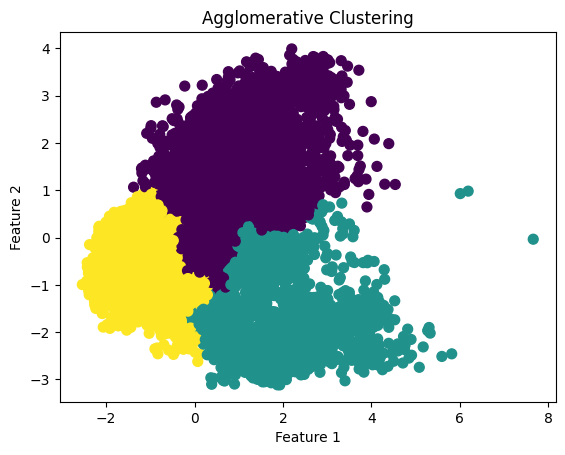

In [ ]:
#hierarchical clustering
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
# Perform agglomerative clustering with a specific number of clusters
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
# 'ward' minimizes the variance within clusters when merging.
#It is commonly used and tends to produce compact, spherical clusters.

# Fit the clustering algorithm and get cluster assignments
clusters = agglo.fit_predict(X_pca)

# Plot the data with cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

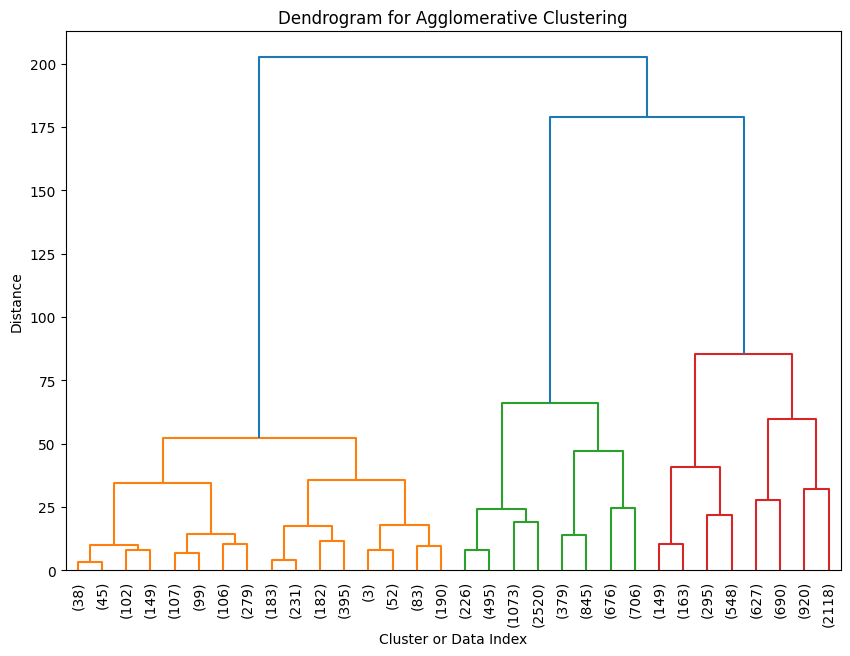

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Create the linkage matrix for the dendrogram
linkage_matrix = linkage(X_pca, method='ward')  # Using 'ward' linkage

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='level',  # To control the detail of the dendrogram
    p=4,  # Levels to show in the dendrogram
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=10,
)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Cluster or Data Index")
plt.ylabel("Distance")
plt.show()